In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [2]:
df = pd.read_csv("creditcard.csv")

In [4]:
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [6]:
trainX,testX = train_test_split(data, test_size=0.2, random_state=35)
trainX = trainX[trainX.Class == 0]
trainX = trainX.drop(['Class'],axis=1)
testY = testX['Class']
testX = testX.drop(['Class'],axis=1)
trainX = trainX.values


In [7]:
layer = Input(shape=(29, ))

In [50]:

encoder = Dense(18, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(layer)
encoder = Dense(9, activation="relu")(encoder)
decoder = Dense(9, activation='tanh')(encoder)
decoder = Dense(29, activation='relu')(decoder)
autoencoder = Model(inputs=layer, outputs=decoder)

In [51]:
nb_epoch = 10
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
autoencoder.fit(trainX, trainX,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(testX, testX),
                    verbose=1)

Epoch 1/10
7108/7108 [==============================] - 6s 836us/step - loss: 0.7573 - accuracy: 0.6406 - val_loss: 0.8000 - val_accuracy: 0.7063
Epoch 2/10
7108/7108 [==============================] - 6s 781us/step - loss: 0.6925 - accuracy: 0.7136 - val_loss: 0.7786 - val_accuracy: 0.7191
Epoch 3/10
7108/7108 [==============================] - 6s 796us/step - loss: 0.6786 - accuracy: 0.7297 - val_loss: 0.7683 - val_accuracy: 0.7324
Epoch 4/10
7108/7108 [==============================] - 6s 792us/step - loss: 0.6724 - accuracy: 0.7408 - val_loss: 0.7617 - val_accuracy: 0.7452
Epoch 5/10
7108/7108 [==============================] - 6s 779us/step - loss: 0.6689 - accuracy: 0.7534 - val_loss: 0.7587 - val_accuracy: 0.7579
Epoch 6/10
7108/7108 [==============================] - 6s 822us/step - loss: 0.6663 - accuracy: 0.7614 - val_loss: 0.7566 - val_accuracy: 0.7635
Epoch 7/10
7108/7108 [==============================] - 6s 853us/step - loss: 0.6649 - accuracy: 0.7647 - val_loss: 0.7549 -

In [43]:
predictions = autoencoder.predict(testX)

In [44]:
err = np.mean(np.power(testX - predictions, 2), axis=1)
err_df = pd.DataFrame({'Error': err,
                        'Class': testY})

In [72]:
threshold = 2.9

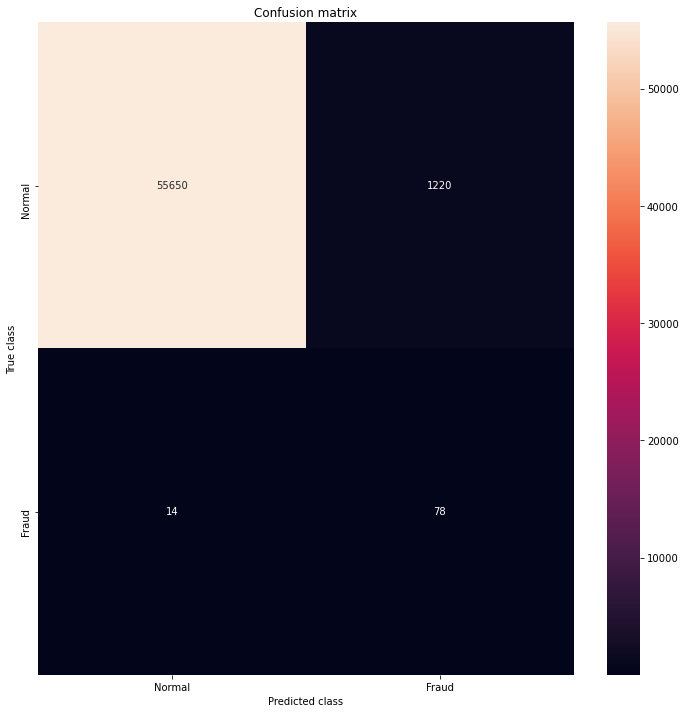

In [73]:
y_pred = [1 if e > threshold else 0 for e in err_df.Error.values]
conf_matrix = confusion_matrix(err_df.Class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [74]:
conf_matrix

array([[55650,  1220],
       [   14,    78]], dtype=int64)

In [75]:
a = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][1]+conf_matrix[1][0])
b = (conf_matrix[0][0]/(conf_matrix[0][1]+conf_matrix[0][0]))
c = (conf_matrix[1][1])/(conf_matrix[1][0]+conf_matrix[1][1])
print(a)
print(b)
print(c)
weightA = 0.2
weightB = 0.3
weightC = 0.5
evaluation = a*weightA + b*weightB+ c*weightC
precision = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[1][1])
recall = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[1][0])
f1 = 2*(precision*recall)/(precision+recall)
print(evaluation)
print(f1)

0.9783364348161933
0.9785475646210656
0.8478260869565217
0.9131445998278191
0.9991740879057741


In [76]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
data = pd.read_csv("creditcard.csv")
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
data.drop(['Time'], axis=1, inplace=True)
data.drop_duplicates(inplace=True)
X = data.drop('Class', axis = 1).values
y = data['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)



model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#model.summary()
model.fit(X_train, y_train, epochs=30)
model.evaluate(X_test, y_test)

Epoch 1/30
6461/6461 [==============================] - 4s 638us/step - loss: 0.0167 - accuracy: 0.9976
Epoch 2/30
6461/6461 [==============================] - 4s 627us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 3/30
6461/6461 [==============================] - 4s 621us/step - loss: 0.0026 - accuracy: 0.9994
Epoch 4/30
6461/6461 [==============================] - 4s 624us/step - loss: 0.0025 - accuracy: 0.9995
Epoch 5/30
6461/6461 [==============================] - 4s 615us/step - loss: 0.0024 - accuracy: 0.9995
Epoch 6/30
6461/6461 [==============================] - 4s 621us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 7/30
6461/6461 [==============================] - 4s 615us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 8/30
6461/6461 [==============================] - 4s 627us/step - loss: 0.0019 - accuracy: 0.9995
Epoch 9/30
6461/6461 [==============================] - 4s 627us/step - loss: 0.0018 - accuracy: 0.9996
Epoch 10/30
6461/6461 [==============================] - 4s 612u

[0.007913140580058098, 0.9992454648017883]

In [79]:
df2 = pd.read_csv("creditcard.csv")
classCount = pd.value_counts(df2['Class'], sort = True)

In [80]:
classCount

0    284315
1       492
Name: Class, dtype: int64

In [88]:
normal_df = df2[df2.Class == 0]
abnormal_df = df2[df2.Class==1]
df3 = pd.concat([normal_df.sample(n=492*4),abnormal_df])

In [89]:
df3

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
109686,71492.0,-1.507723,1.481814,1.193932,-0.240998,-0.324037,-1.131015,0.185114,-0.576412,-0.545023,...,0.589298,-1.067790,-0.041820,0.655812,0.244152,-0.014766,-0.384673,-0.120557,12.99,0
61321,49772.0,-2.258599,-1.413025,1.998255,0.668543,2.110718,-0.813798,0.043209,0.159183,-0.338545,...,0.160672,-0.026540,0.191029,-0.001592,0.731673,-0.444299,-0.217877,-0.131642,110.55,0
268975,163469.0,-0.949476,0.555966,-0.062858,-0.568840,0.493719,-1.093704,0.820350,-0.293125,0.605079,...,-0.291690,-0.666249,0.418695,-0.223031,-0.497684,0.114052,-0.392988,0.168094,2.69,0
918,693.0,1.258623,-0.059568,0.313962,-0.111002,-0.503085,-0.704060,-0.156367,-0.051564,0.369282,...,-0.092682,-0.249538,0.086863,0.124852,0.141399,0.992685,-0.072271,-0.001729,0.85,0
137849,82354.0,-2.510463,-0.564790,0.824644,-1.425196,-2.289998,-0.038136,0.724081,0.754163,0.915393,...,0.396250,0.869391,-0.011226,0.460768,0.282426,-0.699177,-0.044815,-0.265138,367.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [91]:
sc = StandardScaler()
amount = df3['Amount'].values
df3['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
df3.drop(['Time'], axis=1, inplace=True)
df3.drop_duplicates(inplace=True)
X = df3.drop('Class', axis = 1).values
y = df3['Class'].values
X_train2, X_tes2t, y_train2, y_test2 = train_test_split(X, y, test_size = 0.25, random_state = 1)



KeyError: "['Time'] not found in axis"

In [94]:


model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#model.summary()
model.fit(X_train, y_train, epochs=300)


Epoch 1/300
58/58 [==============================] - 0s 667us/step - loss: 1.1410 - accuracy: 0.7291
Epoch 2/300
58/58 [==============================] - 0s 684us/step - loss: 0.2642 - accuracy: 0.9639
Epoch 3/300
58/58 [==============================] - 0s 719us/step - loss: 0.1434 - accuracy: 0.9683
Epoch 4/300
58/58 [==============================] - 0s 681us/step - loss: 0.1126 - accuracy: 0.9721
Epoch 5/300
58/58 [==============================] - 0s 666us/step - loss: 0.0989 - accuracy: 0.9743
Epoch 6/300
58/58 [==============================] - 0s 649us/step - loss: 0.0907 - accuracy: 0.9759
Epoch 7/300
58/58 [==============================] - 0s 649us/step - loss: 0.0847 - accuracy: 0.9765
Epoch 8/300
58/58 [==============================] - 0s 685us/step - loss: 0.0794 - accuracy: 0.9759
Epoch 9/300
58/58 [==============================] - 0s 650us/step - loss: 0.0762 - accuracy: 0.9776
Epoch 10/300
58/58 [==============================] - 0s 667us/step - loss: 0.0717 - accura

Epoch 81/300
58/58 [==============================] - 0s 632us/step - loss: 0.0058 - accuracy: 0.9995
Epoch 82/300
58/58 [==============================] - 0s 631us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 83/300
58/58 [==============================] - 0s 719us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 84/300
58/58 [==============================] - 0s 684us/step - loss: 0.0057 - accuracy: 0.9995
Epoch 85/300
58/58 [==============================] - 0s 667us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 86/300
58/58 [==============================] - 0s 632us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 87/300
58/58 [==============================] - 0s 632us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 88/300
58/58 [==============================] - 0s 667us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 89/300
58/58 [==============================] - 0s 632us/step - loss: 0.0053 - accuracy: 0.9995
Epoch 90/300
58/58 [==============================] - 0s 632us/step - loss: 0.0043

Epoch 160/300
58/58 [==============================] - 0s 614us/step - loss: 5.6052e-04 - accuracy: 1.0000
Epoch 161/300
58/58 [==============================] - 0s 614us/step - loss: 5.5210e-04 - accuracy: 1.0000
Epoch 162/300
58/58 [==============================] - 0s 614us/step - loss: 5.4748e-04 - accuracy: 1.0000
Epoch 163/300
58/58 [==============================] - 0s 614us/step - loss: 5.0391e-04 - accuracy: 1.0000
Epoch 164/300
58/58 [==============================] - 0s 667us/step - loss: 4.8781e-04 - accuracy: 1.0000
Epoch 165/300
58/58 [==============================] - 0s 632us/step - loss: 4.8841e-04 - accuracy: 1.0000
Epoch 166/300
58/58 [==============================] - 0s 649us/step - loss: 4.7933e-04 - accuracy: 1.0000
Epoch 167/300
58/58 [==============================] - 0s 632us/step - loss: 4.6836e-04 - accuracy: 1.0000
Epoch 168/300
58/58 [==============================] - 0s 632us/step - loss: 4.8791e-04 - accuracy: 1.0000
Epoch 169/300
58/58 [================

58/58 [==============================] - 0s 807us/step - loss: 6.6453e-05 - accuracy: 1.0000
Epoch 237/300
58/58 [==============================] - 0s 632us/step - loss: 6.6620e-05 - accuracy: 1.0000
Epoch 238/300
58/58 [==============================] - 0s 614us/step - loss: 6.0577e-05 - accuracy: 1.0000
Epoch 239/300
58/58 [==============================] - 0s 614us/step - loss: 5.9188e-05 - accuracy: 1.0000
Epoch 240/300
58/58 [==============================] - 0s 614us/step - loss: 6.4868e-05 - accuracy: 1.0000
Epoch 241/300
58/58 [==============================] - 0s 649us/step - loss: 5.9550e-05 - accuracy: 1.0000
Epoch 242/300
58/58 [==============================] - 0s 632us/step - loss: 5.8013e-05 - accuracy: 1.0000
Epoch 243/300
58/58 [==============================] - 0s 632us/step - loss: 5.5639e-05 - accuracy: 1.0000
Epoch 244/300
58/58 [==============================] - 0s 632us/step - loss: 5.3993e-05 - accuracy: 1.0000
Epoch 245/300
58/58 [==============================

[0.23244205117225647, 0.9819880127906799]

In [97]:
print(model.evaluate(testX, testY))
model.evaluate(X_test, y_test)

1781/1781 [==============================] - 1s 580us/step - loss: 0.2324 - accuracy: 0.9820
[0.23244205117225647, 0.9819880127906799]
20/20 [==============================] - 0s 895us/step - loss: 0.5904 - accuracy: 0.9770


[0.590418815612793, 0.9770491719245911]